In [1]:
import pandas as pd



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
categorical=['PUlocationID','DOlocationID']
    

In [3]:
def read_dataframe(file_name):
    df = pd.read_parquet(file_name, engine='pyarrow')
    df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
    df.dropOff_datetime = pd.to_datetime(df.dropOff_datetime)
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda x: x.total_seconds()/60)
    df=df.fillna(-1)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    categorical=['PUlocationID','DOlocationID']
    df[categorical]=df[categorical].astype(str)
    return df
# df=df[(df.)]



In [4]:
train_df=read_dataframe('../data/fhv_tripdata_2021-01.parquet')
val_df=read_dataframe('../data/fhv_tripdata_2021-02.parquet')

In [5]:

train_df.duration.mean()

16.2472533682457

In [7]:
(len(train_df[train_df['PUlocationID']==-1].any(axis=1)) /len(train_df))* 100

0.0

c:\Users\haddi\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\haddi\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\haddi\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\User

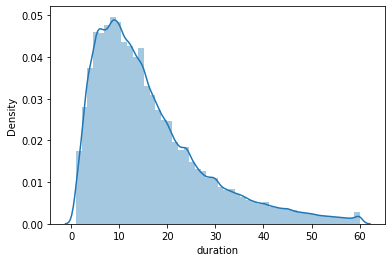

In [ ]:
sns.distplot(df.duration)

In [8]:
train_df.duration.describe(percentiles=[0.95,0.98,0.99])

count    1.109826e+06
mean     1.624725e+01
std      1.155150e+01
min      1.000000e+00
50%      1.323333e+01
95%      4.070000e+01
98%      4.936667e+01
99%      5.423333e+01
max      6.000000e+01
Name: duration, dtype: float64

In [11]:
train_dicts=train_df[categorical].to_dict('records')

In [12]:
dv=DictVectorizer()
X_train=dv.fit_transform(train_dicts)
X_val=dv.transform(val_df[categorical].to_dict('records'))


In [13]:
target='duration'
y_train=train_df[target].values
    

In [14]:

y_val=val_df[target].values
    

In [15]:
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [16]:
train_pred=lr.predict(X_train)
val_pred=lr.predict(X_val)



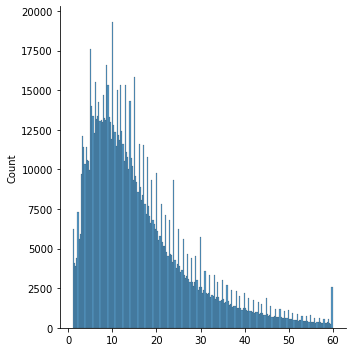

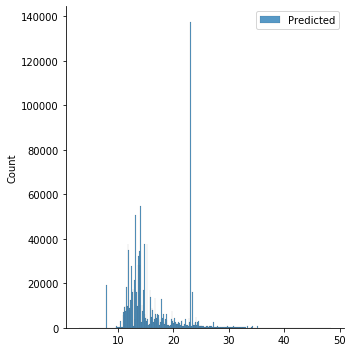

In [ ]:
# sns.displot(y_train,label='Actual')
# sns.displot(pred,label='Predicted')
# plt.legend()

In [17]:
mean_squared_error(y_val,val_pred,squared=False)

11.014283140085958

In [18]:
mean_squared_error(y_train,train_pred,squared=False)

10.528519107204893

In [ ]:
X_train.shape

(1109826, 525)

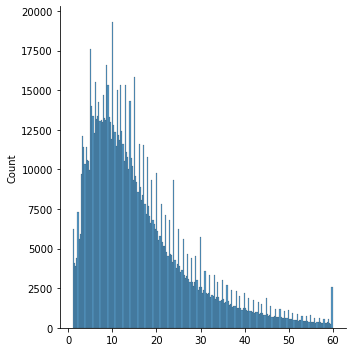

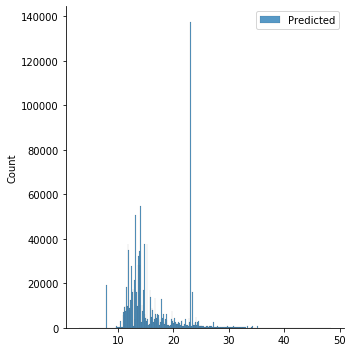

110.8497145907785

(1109826, 525)